In [1]:
#import image_analysis as ia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm

In [2]:
data = "D:\Raphael\Data"
exID = 7
CD={0:"aSyn_GFP",1:"DAPI",2:"ConcA1"}
#ia.registration(data=data,exID=exID).split_all()
#reg = ia.registration(data=data,exID=exID)
#reg.rename_rep(3)
#reg.rename_rep(4)
#reg.rename_rep(5)

In [3]:
#seg = ia.segmentation(data=data,exID=exID,t_mod=0.75,ch_dic=CD,cell_channel="ConcA1",seg_nuc=True,min_obj=3)
#seg.plot_segmentation(IDs=[253,670])

In [4]:
#seg.segment_all()

In [5]:
#detect=ia.detection(data=data,exID=exID,ch_dic=CD)


In [6]:
#detect.detect_simple()

In [7]:
loc = "D:/Raphael/Data/7. Exocytosed aSyn-GFP gets taken up by untransfected cells"
df = pd.read_excel(os.path.join(loc,"Results_2.xlsx"))
df.head()

,Unnamed: 0.1,Unnamed: 0,label,bbox-0,bbox-1,bbox-2,bbox-3,label_aSyn_GFP,bbox-0_aSyn_GFP,bbox-1_aSyn_GFP,...,ROI_path,Replicate,Group1,Group2,path,coord_path,Otsu,Rel,PointCount,int
0,0,0,2,1183,965,1593,1619,2,1183,965,...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,1,BL,BL,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000047,1.243478,1,184.0
1,1,1,3,230,959,963,1456,3,230,959,...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,1,BL,BL,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000047,1.208696,0,NaN
2,2,2,4,574,1338,1432,1895,4,574,1338,...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,1,BL,BL,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.234783,2,196.5
3,3,3,7,1207,348,1661,944,7,1207,348,...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,1,BL,BL,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000048,1.286957,0,NaN
4,4,4,8,1484,846,2009,1346,8,1484,846,...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,1,BL,BL,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,E:\Raphael\Data\7. Exocytosed aSyn-GFP gets ta...,0.000049,1.243478,0,NaN


In [8]:
print (df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'label', 'bbox-0', 'bbox-1', 'bbox-2',
       'bbox-3', 'label_aSyn_GFP', 'bbox-0_aSyn_GFP', 'bbox-1_aSyn_GFP',
       'bbox-2_aSyn_GFP', 'bbox-3_aSyn_GFP', 'intensity_max_aSyn_GFP',
       'intensity_min_aSyn_GFP', 'intensity_mean_aSyn_GFP', 'area_aSyn_GFP',
       'intensity_median_aSyn_GFP', 'CID', 'PID', 'Channel_0',
       'Channel_aSyn_GFP', 'Channel_1', 'Channel_DAPI', 'Channel_2',
       'Channel_ConcA1', 'ROI_path', 'Replicate', 'Group1', 'Group2', 'path',
       'coord_path', 'Otsu', 'Rel', 'PointCount', 'int'],
      dtype='object')


In [20]:
df.groupby(["Group1","Group2"])["intensity_min_aSyn_GFP"].mean()

Group1  Group2
BL      BL        95.494488
TP      CQ        96.010525
        Ctrl      95.601412
X       CQ        95.686607
        Ctrl      96.666002
Name: intensity_min_aSyn_GFP, dtype: float64

In [ ]:
df[df["PointCount"]>0].groupby(["Replicate","Group1","Group2"])["Rel"].count()/df.groupby(["Replicate","Group1","Group2"])["Rel"].count()

In [11]:
df[df["PointCount"]>0].groupby(["Group1","Group2"])["Rel"].count()*100/df.groupby(["Group1","Group2"])["Rel"].count()

Group1  Group2
BL      BL        0.719910
TP      CQ        1.092568
        Ctrl      1.270703
X       CQ        1.567710
        Ctrl      0.623913
Name: Rel, dtype: float64

In [12]:
df2 = pd.DataFrame(df[df["PointCount"]>0].groupby(["Group1","Group2"])["Rel"].count()).reset_index()
df2["G"] = df2["Group1"]+"_"+df2["Group2"]
df2 = df2.drop(["Group1","Group2"],axis=1)

df3 = pd.DataFrame(df[df["PointCount"]==0].groupby(["Group1","Group2"])["Rel"].count()).reset_index()
df3["G"] = df3["Group1"]+"_"+df3["Group2"]
df3 = df3.drop(["Group1","Group2"],axis=1)

DF = df2.merge(df3,on="G")
DF = DF.set_index("G").rename(columns={"Rel_x": "Puncta", "Rel_y": "No Puncta"})
DF.head()

,Puncta,No Puncta
G,,
BL_BL,96,13239
TP_CQ,273,24714
TP_Ctrl,234,18181
X_CQ,315,19778
X_Ctrl,122,19432


In [22]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(DF, correction=True)
print(dof)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

4
Chi2 result of the contingency table: 105.39429243734286, p-value: 6.98025664175962e-22


In [21]:
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
# post-hoc
all_combinations = list(combinations(DF.index, 2))  # gathering all combinations for post-hoc chi2
p_vals = []
print("Significance results:")
for comb in all_combinations:
    new_df = DF[(DF.index == comb[0]) | (DF.index == comb[1])]
    chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
    p_vals.append(p)
    # print(f"For {comb}: {p}")  # uncorrected

# checking significance
# correction for multiple testing
reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
    print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} reject: {reject}")

Significance results:
1
1
1
1
1
1
1
1
1
1
('BL_BL', 'TP_CQ'): p_value: 0.000459; corrected: 0.000656 reject: True
('BL_BL', 'TP_Ctrl'): p_value: 0.000002; corrected: 0.000005 reject: True
('BL_BL', 'X_CQ'): p_value: 0.000000; corrected: 0.000000 reject: True
('BL_BL', 'X_Ctrl'): p_value: 0.325026; corrected: 0.325026 reject: False
('TP_CQ', 'TP_Ctrl'): p_value: 0.096547; corrected: 0.107274 reject: False
('TP_CQ', 'X_CQ'): p_value: 0.000012; corrected: 0.000020 reject: True
('TP_CQ', 'X_Ctrl'): p_value: 0.000000; corrected: 0.000001 reject: True
('TP_Ctrl', 'X_CQ'): p_value: 0.015828; corrected: 0.019785 reject: True
('TP_Ctrl', 'X_Ctrl'): p_value: 0.000000; corrected: 0.000000 reject: True
('X_CQ', 'X_Ctrl'): p_value: 0.000000; corrected: 0.000000 reject: True


In [60]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [63]:
print(corrected_p_vals,all_combinations)

[6.56061554e-04 4.71355223e-06 4.04121184e-11 3.25026338e-01
 1.07274081e-01 1.99932357e-05 5.41060740e-07 1.97853936e-02
 3.01002089e-10 3.53246076e-18] [('BL_BL', 'TP_CQ'), ('BL_BL', 'TP_Ctrl'), ('BL_BL', 'X_CQ'), ('BL_BL', 'X_Ctrl'), ('TP_CQ', 'TP_Ctrl'), ('TP_CQ', 'X_CQ'), ('TP_CQ', 'X_Ctrl'), ('TP_Ctrl', 'X_CQ'), ('TP_Ctrl', 'X_Ctrl'), ('X_CQ', 'X_Ctrl')]


0.8


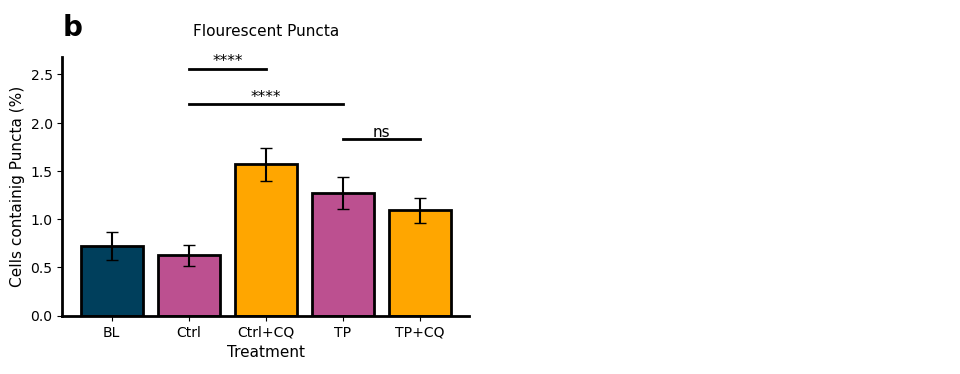

In [72]:

def drawsigbars(ax, ctrl, treatment, maxv, y_range, diff,pv):
    import matplotlib.pyplot as plt
    import pathophys as pp
    ctrls = ctrl
    treatments = treatment
    if (type(ctrl) is dict) == True:
        ctrls = list(ctrl.keys())[0]
        ctrl = ctrl[ctrls]
        treatments = list(treatment.keys())[0]
        treatment = treatment[treatments]
        print(ctrl)
    ax.plot(
        [ctrl, ctrl, treatment, treatment],
        [maxv, maxv, maxv, maxv], lw=2, c='k'
    )
    p = convert_pvalue_to_asterisks(pv)
    ax.text((ctrl+diff), maxv, p, ha='center', va='bottom', fontsize=11)


import pathophys as pp
from statsmodels.stats.proportion import proportion_confint
sigp = [["TP","TP+CQ"],["Ctrl","TP"],["Ctrl","Ctrl+CQ"]]
titledic = {"BL_BL":"BL","X_Ctrl":"Ctrl","X_CQ":"Ctrl+CQ","TP_Ctrl":"TP","TP_CQ":"TP+CQ",}
pv = {}
for p_val,comb in zip(corrected_p_vals, all_combinations):
    if titledic[comb[0]] not in list(pv.keys()):
        pv[titledic[comb[0]]] = {}
        pv[titledic[comb[0]]][titledic[comb[1]]] = p_val
    else:
        pv[titledic[comb[0]]][titledic[comb[1]]] = p_val
    if titledic[comb[1]] not in list(pv.keys()):
        pv[titledic[comb[1]]] = {}
        pv[titledic[comb[1]]][titledic[comb[0]]] = p_val
    else:
        pv[titledic[comb[1]]][titledic[comb[0]]] = p_val

params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
print(bs)
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(24*pp.cm,9*pp.cm))
subfigs = fig.subfigures(1,2,width_ratios=(1,1))
ax = subfigs[0].subplots(1, 1, sharey=True)
cond = []
maxvs = 0
for g in ['BL_BL','X_Ctrl','X_CQ','TP_Ctrl','TP_CQ']:
    dfg = DF.loc[[g]]
    color = ""
    if "BL" in g:
        color = params["Colors"][0]
    if "Ctrl" in g:
        color = params["Colors"][1]
    if "CQ" in g:
        color = params["Colors"][2]
    x = titledic[g]
    cond.append(x)
    n = (dfg["Puncta"]+dfg["No Puncta"]).values[0]
    y = dfg["Puncta"].values[0]/n
    ci = y-proportion_confint(y*n, n, alpha=0.05, method='normal')[0]
    ax.bar(x, y*100, 0.8, yerr=ci*100, capsize=4, linewidth=ls, edgecolor="black",color=color)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        ax.spines[axis].set_visible(False)
colors = params["Colors"]

maxv = ax.get_ylim()[1]
hightind = 0
#axUp.set_ylim(ymin=dfGFP["intensity_mean_GFP"].min())
bottom, top = axUp.get_ylim()
y_range = maxv - bottom
#maxv = maxv+y_range*0.2
hightind = 0
for sp in sigp:
    c1 = sp[0]
    ctrli = cond.index(c1)
    c2 = sp[1]
    treatmenti = cond.index(c2)
    diff = (treatmenti-ctrli)/2
    p = pv[c1][c2]
    drawsigbars(ax, ctrli, treatmenti, maxv+hightind, y_range, diff,p)
    hightind = hightind + y_range*0.2
ax.set_title("Flourescent Puncta", fontsize=11)
ax.set_title("b", loc="left", fontsize=20, fontweight="bold", pad=15)
ax.set_xlabel("Treatment", fontsize=11)
ax.set_ylabel("Cells containig Puncta (%)", fontsize=11)



plt.show()

In [ ]:
sigp = [["BL_BL","TP_Ctrl"],["BL_BL","X_CQ"],["TP_Ctrl","TP_CQ"]]

params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(29*pp.cm,18*pp.cm))
subfigs = fig.subfigures(1,2,width_ratios=(1,1))
axUp = subfigs[0][2].subplots(1, 1, sharey=True)
X1 = []
Y1 = []
CI1 = []
maxvs = 0
for g in ['BL_BL','X_Ctrl','X_CQ','TP_Ctrl','TP_CQ']:
    dfg = DF.iloc[[g]]
    x = g
    n = (dfg["Puncta"]+dfg["No Puncta"]).values[0]
    y = dfg["Puncta"].values[0]/n
    ci = y-proportion_confint(y*n, n, alpha=0.05, method='normal')[0]
    ax.bar(g, data.mean(), bw, yerr=ci, capsize=4, linewidth=ls, edgecolor="black")

for axis in ['top','bottom','left','right']:
    axUp.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axUp.spines[axis].set_visible(False)
colors = params["Colors"]
for median in bplot1['medians']:
    median.set_color('black')
for patch, color in zip(bplot1['boxes'], colors):
    print(patch)
    patch.set_facecolor(color)
axUp.tick_params(width=ls)
maxv = axUp.get_ylim()[1]
hightind = 0
#axUp.set_ylim(ymin=dfGFP["intensity_mean_GFP"].min())
bottom, top = axUp.get_ylim()
y_range = maxv - bottom
#maxv = maxv+y_range*0.2
treatmenti = 0
for pairs in sigp:
    c1 = pairs[0]
    ctrli = X1.index(c1)
    c2 = pairs[1]
    treatmenti = X1.index(c2)
    c1dic = {c1:ctrli+1}
    c2dic = {c2:treatmenti+1}
    diff = ((treatmenti-ctrli)/2)+1
    pp.drawsigbars(df, axUp, "Group1", "measure_median_GFP", c1dic, c2dic, maxv+hightind, y_range, diff)
    hightind = hightind + y_range*0.2
axUp.set_title("GFP", fontsize=11)
axUp.set_title("e", loc="left", fontsize=20, fontweight="bold", pad=15)
axUp.set_xlabel("Treatment", fontsize=11)
axUp.set_ylabel("Median Intensity", fontsize=11)



plt.show()